In [153]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for simple plots
from sklearn.preprocessing import StandardScaler
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns # for slightly more complicated plots
import numpy as np # for numerical computing and linear algebra data structur
from numba import jit # for JIT compilation facilties for improved efficiency
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score,roc_curve, roc_auc_score
import sklearn.linear_model as linear
import sklearn.metrics as metrics
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


#### Data Ingestion

DATA DESCRIPTION:<br>
Input features:<br>
Objective: factual information;<br>
Examination: results of medical examination;<br>
Subjective: information given by the patient.<br>

Features:<br>
Age | Objective Feature | age | int (days)<br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary | 1-Yes, 0-No<br>
Alcohol intake | Subjective Feature | alco | binary | 1-Yes, 0-No<br>
Physical activity | Subjective Feature | active | binary | 1-Yes, 0-No<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 1-Yes, 0-No” <br>


In [154]:
#Reading in the data and storing it into a pandas dataframe
df = pd.read_csv('cardio_train 3.csv',sep=';') 

#### Data Pre-Processing

In [155]:
#display first 20 rows
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


#### Checking for duplicate ids in the dataset

In [156]:
df['id'].value_counts() 
#no duplicates found hence keep all rows

0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: id, Length: 70000, dtype: int64

Converting age from number of days to year

In [157]:
df['age'] = (df['age'] / 365.25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Data Observation

In [158]:
df.info()
#The data is in an appropriate format and contains all its values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.7 MB


#### Data imputation to preserve statistical power, avoid bias as much as possible.

In [159]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({
                                     'percent_missing': percent_missing})
    return missing_value_df

produce_missing_report(df) #Confirmed no data missing from the rows

,percent_missing
id,0.0
age,0.0
gender,0.0
height,0.0
weight,0.0
ap_hi,0.0
ap_lo,0.0
cholesterol,0.0
gluc,0.0
smoke,0.0


#### Data Standardization to ensure that all features have a similar scale and variance.

In [160]:
def standardize_col(col):
    scaler = StandardScaler()
    std_col = scaler.fit_transform(col.values.reshape(-1, 1))
    return std_col

standardize_col(df['age'])
standardize_col(df['height'])
standardize_col(df['weight'])
standardize_col(df['ap_hi'])
standardize_col(df['ap_lo'])
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Outlier Detection analysis on the age, height, weight, ap_hi, and ap_lo columns, since they are continuous numerical variables that may have outliers.

Performing outlier detection on the age column

In [161]:
df['age'].describe()

count    70000.000000
mean        52.803257
std          6.762462
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

In [162]:
Q1 = df['age'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['age'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  48.0
Q3  58.0
IQR 10.0


In [163]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  73.0
lower  33.0


In [164]:
df_without_outliers = df[(df['age'] < upper_bound) & (df['age'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x210e5ca2f20>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5ca34c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5ca2c50>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5ca3a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5ca3d30>],
 'means': []}

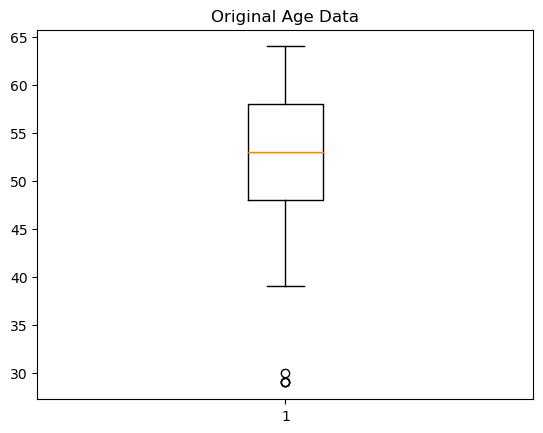

In [165]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Age Data')
ax1.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x210e5cc45e0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5cc4b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5cc4310>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5cc5120>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5cc53f0>],
 'means': []}

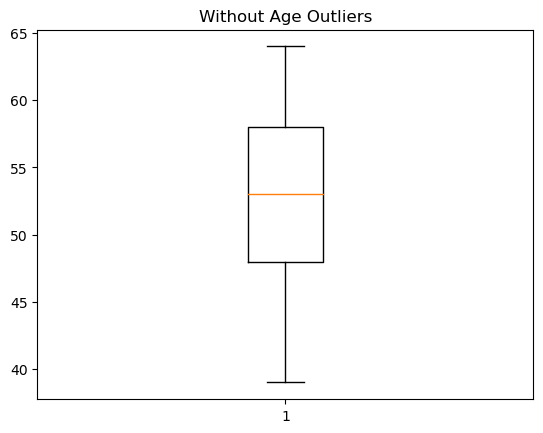

In [166]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Age Outliers')
ax1.boxplot(df_without_outliers['age'])

In [167]:
df_without_outliers = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69992,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69993,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69994,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the height column

In [168]:
df['height'].describe() # uncertain of if this is needed, people have varied height doesnt mean it contributes to CVD. however the column continuous. do correlation matrix to see the relevance

count    69996.000000
mean       164.359063
std          8.210122
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [169]:
Q1 = df['height'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['height'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  159.0
Q3  170.0
IQR 11.0


In [170]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  186.5
lower  142.5


In [171]:
df_without_outliers = df[(df['height'] < upper_bound) & (df['height'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69992,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69993,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69994,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x210e5ced4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5ceda80>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5ced210>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5cee020>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5cee2f0>],
 'means': []}

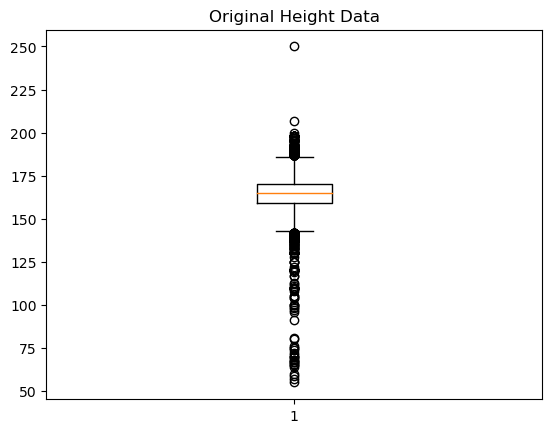

In [172]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Height Data')
ax1.boxplot(df['height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x210e5d37eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5d58490>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5d37be0>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5d58a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5d58d00>],
 'means': []}

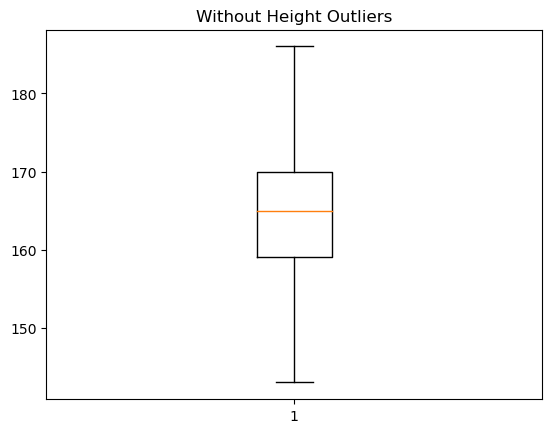

In [173]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Height Outliers')
ax1.boxplot(df_without_outliers['height'])

In [174]:
df_without_outliers = df[(df['height'] > lower_bound) & (df['height'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69472,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69473,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69474,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69475,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the weight column

In [175]:
df['weight'].describe()

count    69477.000000
mean        74.152953
std         14.287850
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [176]:
Q1 = df['weight'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['weight'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  65.0
Q3  82.0
IQR 17.0


In [177]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  107.5
lower  39.5


In [178]:
df_without_outliers = df[(df['weight'] < upper_bound) & (df['weight'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69471,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
69472,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69474,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69475,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x210e27958d0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e2794eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e2796170>],
 'medians': [<matplotlib.lines.Line2D at 0x210e1ec2440>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e1ec1960>],
 'means': []}

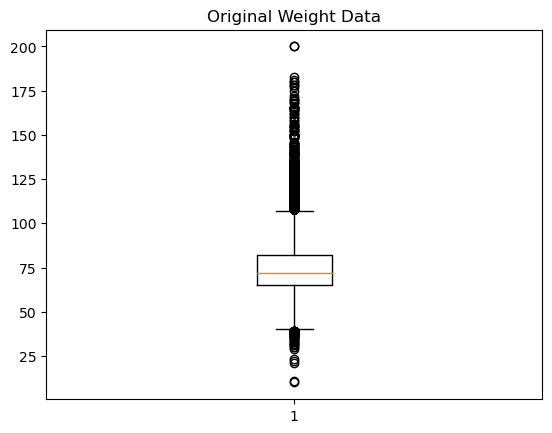

In [179]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Weight Data')
ax1.boxplot(df['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x210e2855090>,
 'caps': [<matplotlib.lines.Line2D at 0x210e2855630>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e2854dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x210e2855bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e2855ea0>],
 'means': []}

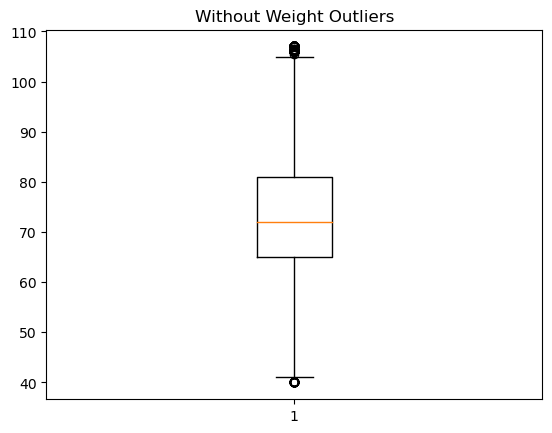

In [180]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Weight Outliers')
ax1.boxplot(df_without_outliers['weight'])

In [181]:
df_without_outliers = df[(df['weight'] > lower_bound) & (df['weight'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67714,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
67715,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
67716,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
67717,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the ap_hi column

In [182]:
df['ap_hi'].describe()

count    67719.000000
mean       128.585951
std        156.528328
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [183]:
Q1 = df['ap_hi'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['ap_hi'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  120.0
Q3  140.0
IQR 20.0


In [184]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  170.0
lower  90.0


In [185]:
df_without_outliers = df[(df['ap_hi'] < upper_bound) & (df['ap_hi'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67713,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
67714,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
67715,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
67717,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x210e5d900d0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5d90670>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5d8bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5d90c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5d90ee0>],
 'means': []}

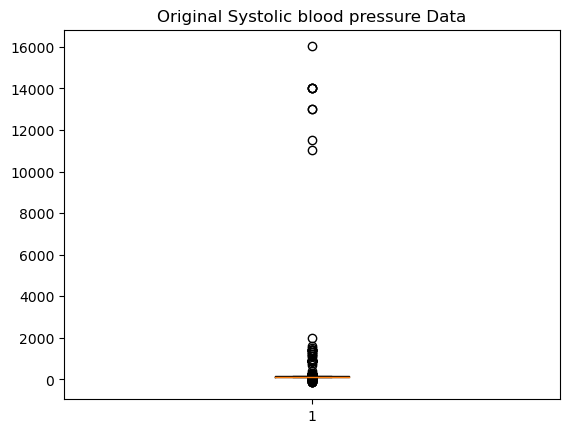

In [186]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Systolic blood pressure Data')
ax1.boxplot(df['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x210e5ee72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5ee7850>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5ee6fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5ee7df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5f00100>],
 'means': []}

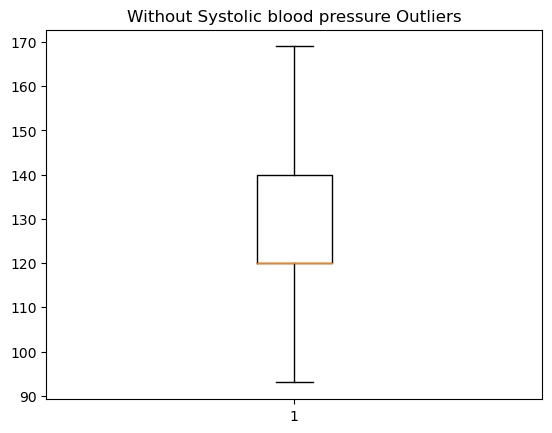

In [187]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Systolic blood pressure Outliers')
ax1.boxplot(df_without_outliers['ap_hi'])

In [188]:
df_without_outliers = df[(df['ap_hi'] > lower_bound) & (df['ap_hi'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64798,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
64799,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
64800,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
64801,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the ap_lo column

In [189]:
df['ap_lo'].describe()

count    64803.000000
mean        93.685107
std        181.503375
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

In [190]:
Q1 = df['ap_lo'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['ap_lo'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  80.0
Q3  90.0
IQR 10.0


In [191]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  105.0
lower  65.0


In [192]:
df_without_outliers = df[(df['ap_lo'] < upper_bound) & (df['ap_lo'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,8,59,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64798,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
64799,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
64800,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
64801,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x210e5f2a8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5f2ae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5f2a620>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5f2b430>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5f2b700>],
 'means': []}

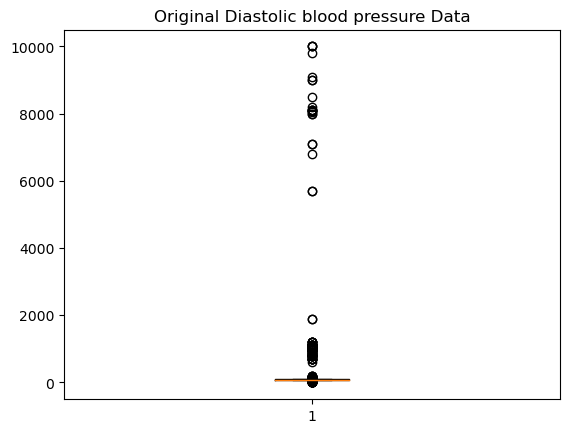

In [193]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Diastolic blood pressure Data')
ax1.boxplot(df['ap_lo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x210e5f849d0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e5f84f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e5f84700>],
 'medians': [<matplotlib.lines.Line2D at 0x210e5f85510>],
 'fliers': [<matplotlib.lines.Line2D at 0x210e5f857e0>],
 'means': []}

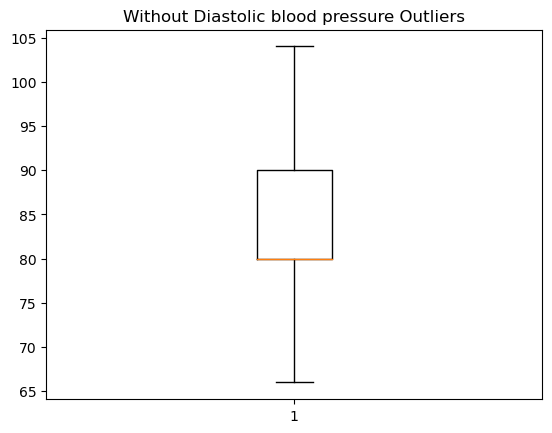

In [194]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Diastolic blood pressure Outliers')
ax1.boxplot(df_without_outliers['ap_lo'])

In [195]:
df_without_outliers = df[(df['ap_lo'] > lower_bound) & (df['ap_lo'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,8,59,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61766,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
61767,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
61768,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
61769,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## EDA

Non-Modifiable Cause:

Old Age
Heridity
Gender Factor such as Male

Modifiable Cause: 
Alcohol
Smoking
Physical activity


## Univariate and Bivariate analysis 


In [196]:
df.dtypes

id               int64
age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [197]:
# to understand variables look at their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61771 non-null  int64  
 1   age          61771 non-null  int32  
 2   gender       61771 non-null  int64  
 3   height       61771 non-null  int64  
 4   weight       61771 non-null  float64
 5   ap_hi        61771 non-null  int64  
 6   ap_lo        61771 non-null  int64  
 7   cholesterol  61771 non-null  int64  
 8   gluc         61771 non-null  int64  
 9   smoke        61771 non-null  int64  
 10  alco         61771 non-null  int64  
 11  active       61771 non-null  int64  
 12  cardio       61771 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 5.9 MB


#### Investigating if age has an influence on the target variable 

<AxesSubplot:xlabel='age', ylabel='count'>

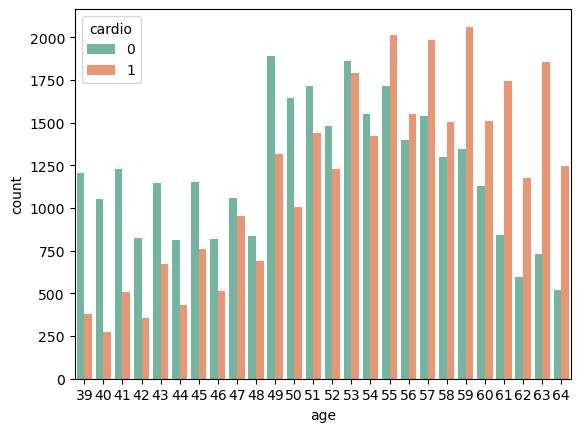

In [198]:
sns.countplot(x='age', hue='cardio', data = df, palette="Set2")
#This plot has shown that CVD is more prevalent in patients who 55 years old and  older hence age influences the target variable- presence or absence of CVD

#### Descriptive statistics

In [199]:
df.describe()
#displays statistics such as min, max, mean, std

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000
mean,49958.487041,52.863123,1.348853,164.421622,73.159013,126.182189,81.651163,1.355863,1.220103,0.086432,0.052015,0.804309,0.491865
std,28868.135268,6.734729,0.476611,7.526360,12.247023,13.692640,7.566325,0.674082,0.567387,0.281003,0.222058,0.396735,0.499938
min,0.000000,39.000000,1.000000,143.000000,40.000000,95.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24888.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50013.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74893.500000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,169.000000,104.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Investigation the gender distribution in the dataset

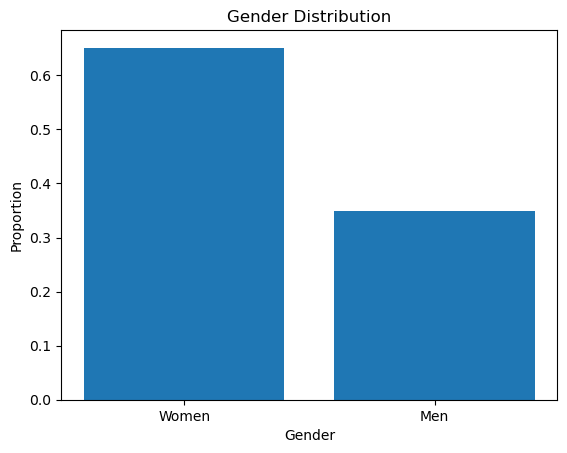

In [200]:
gender_map = {1: 'Women', 2: 'Men'}
gender_counts = df['gender'].map(gender_map).value_counts(normalize=True)
plt.bar(gender_counts.index, gender_counts)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()
# there are more female test subjects in the dataset than male

#### Investigating if gender has an influence on the target variable 

<AxesSubplot:xlabel='gender', ylabel='count'>

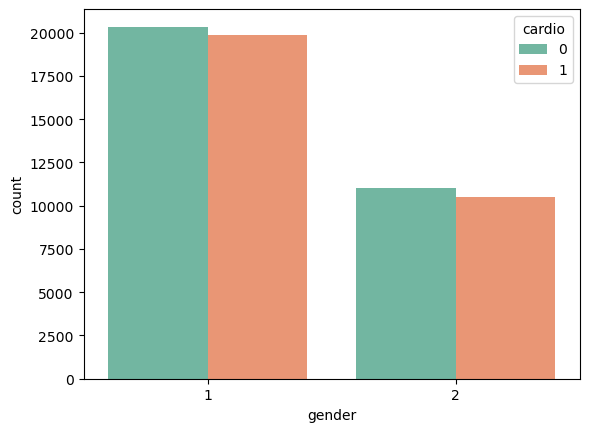

In [201]:
sns.countplot(x='gender', hue='cardio', data = df, palette="Set2")
#gender does not affect the target variable

<AxesSubplot:xlabel='variable', ylabel='count'>

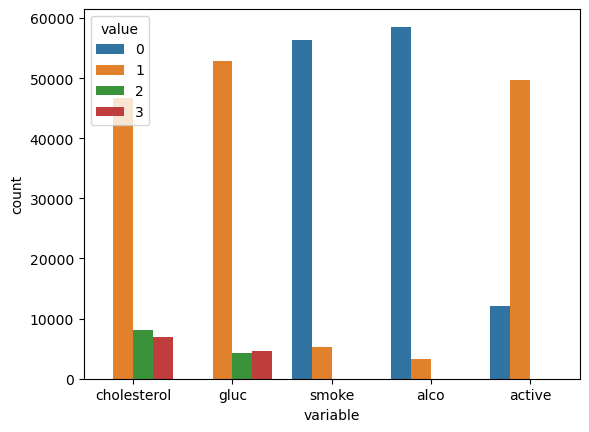

In [202]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical))
# this shows the socioeconomic factors that affect patients (some attributes that may lead to cvd)

<AxesSubplot:ylabel='Frequency'>

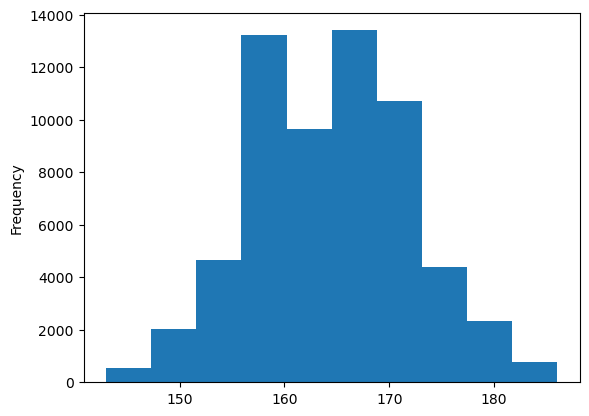

In [203]:
df['height'].plot(kind='hist')
# patients in this dataset were avg 150-175 in height

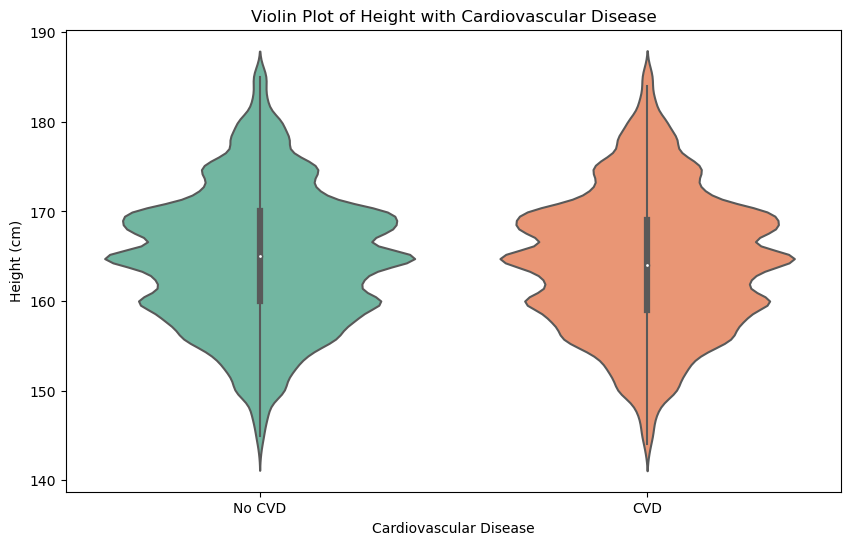

In [204]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='height', data=df, palette='Set2')
plt.xticks(ticks=[0, 1], labels=['No CVD', 'CVD'])
plt.title('Violin Plot of Height with Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Height (cm)')
plt.show()
#height has no significant influence on target variable

<AxesSubplot:ylabel='Frequency'>

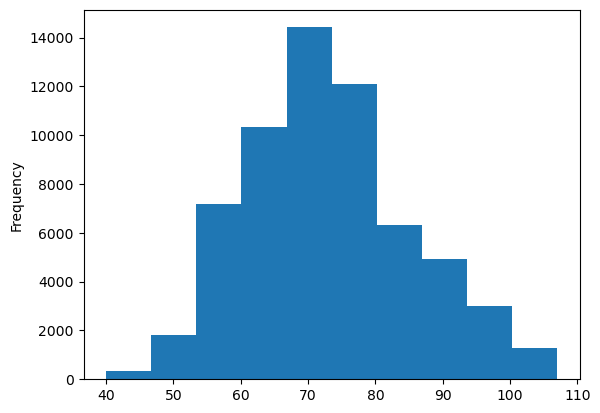

In [205]:
df['weight'].plot(kind='hist')
#patients in this dataset (were mainly 50-80 in weight)

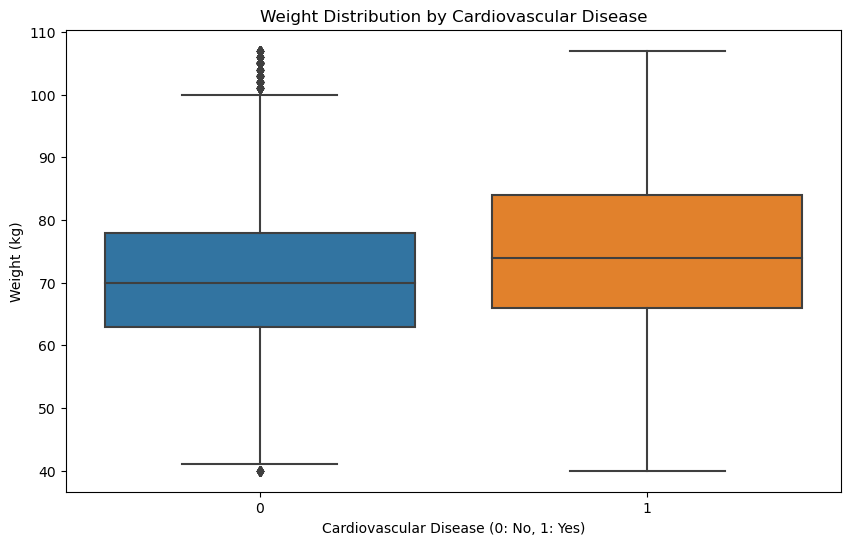

In [206]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='cardio', y='weight', data=df)
plt.title('Weight Distribution by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Weight (kg)')
plt.show()
#weight has no significant influence on target variable

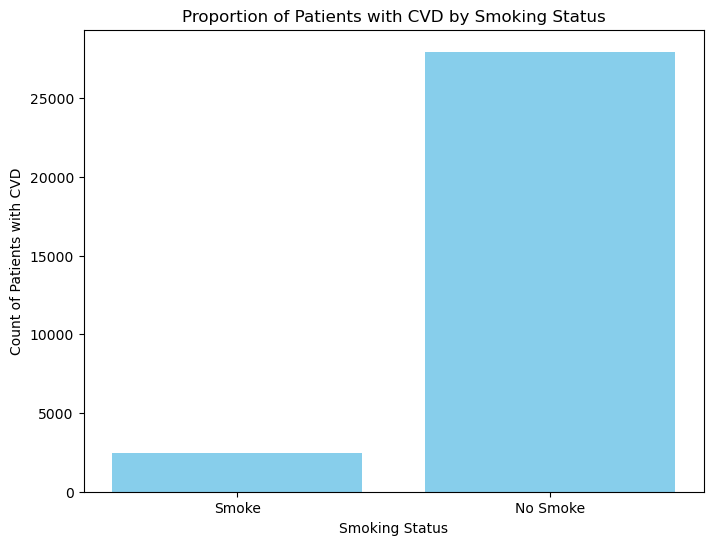

In [207]:
smoke_cvd_counts = df[df['smoke'] == 1]['cardio'].value_counts()
no_smoke_cvd_counts = df[df['smoke'] == 0]['cardio'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.bar(['Smoke', 'No Smoke'], [smoke_cvd_counts[1], no_smoke_cvd_counts[1]], color='skyblue')
plt.title('Proportion of Patients with CVD by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Patients with CVD')
plt.show()
#the majority of the test subjects with cardio were none smokers

In [208]:
df['smoke'].value_counts()
# based on the dataset, the majority of patients are none smokers hence find the percentage of cvd test subjects in each class

0    56432
1     5339
Name: smoke, dtype: int64

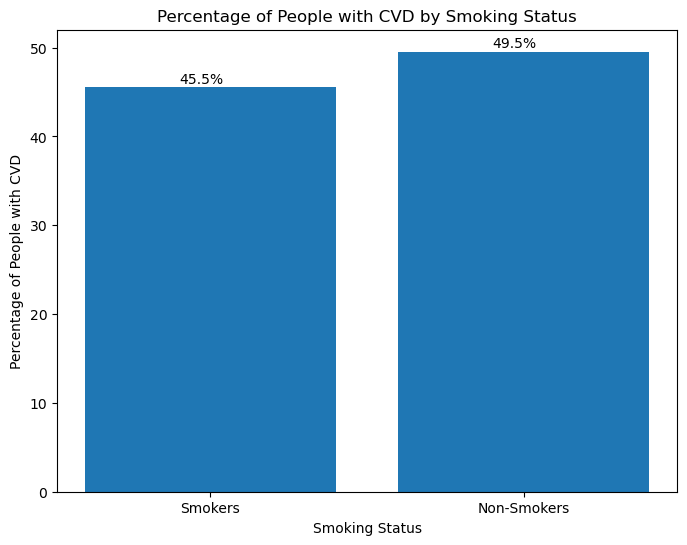

In [209]:
smokers_with_cvd = df[df['smoke'] == 1]['cardio'].mean() * 100
non_smokers_with_cvd = df[df['smoke'] == 0]['cardio'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Smokers', 'Non-Smokers'], [smokers_with_cvd, non_smokers_with_cvd])
plt.title('Percentage of People with CVD by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of People with CVD')
plt.text(-0.1, smokers_with_cvd + 0.5, f'{smokers_with_cvd:.1f}%', color='black')
plt.text(0.9, non_smokers_with_cvd + 0.5, f'{non_smokers_with_cvd:.1f}%', color='black')
plt.show()
#This indicates that smoking may not be the sole risk factor for CVD 

<AxesSubplot:ylabel='alco'>

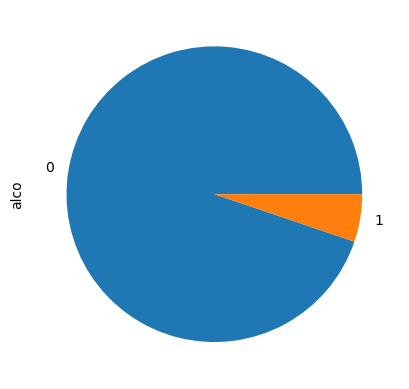

In [210]:
df["alco"].value_counts().plot(kind='pie')
# most of the patients in the dataset are seen to be non alcoholics  

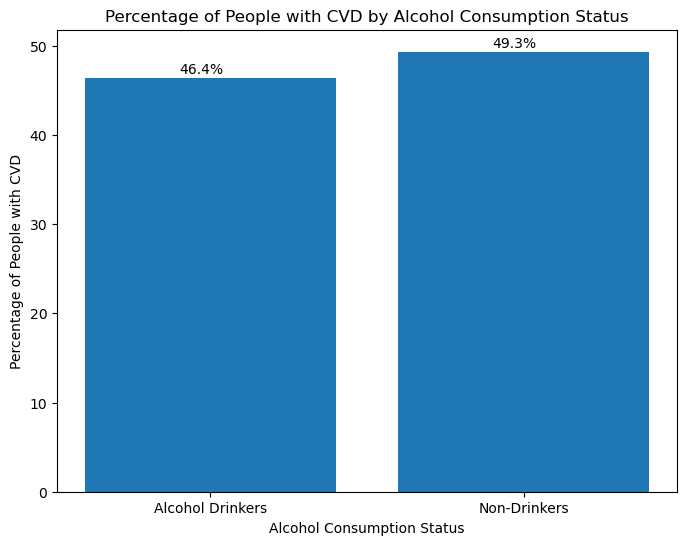

In [211]:
drinkers_with_cvd = df[df['alco'] == 1]['cardio'].mean() * 100
non_drinkers_with_cvd = df[df['alco'] == 0]['cardio'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Alcohol Drinkers', 'Non-Drinkers'], [drinkers_with_cvd, non_drinkers_with_cvd])
plt.title('Percentage of People with CVD by Alcohol Consumption Status')
plt.xlabel('Alcohol Consumption Status')
plt.ylabel('Percentage of People with CVD')
plt.text(-0.1, drinkers_with_cvd + 0.5, f'{drinkers_with_cvd:.1f}%', color='black')
plt.text(0.9, non_drinkers_with_cvd + 0.5, f'{non_drinkers_with_cvd:.1f}%', color='black')
plt.show()
#Alcoholism has no significant influence on target variable in the dataset

<AxesSubplot:ylabel='active'>

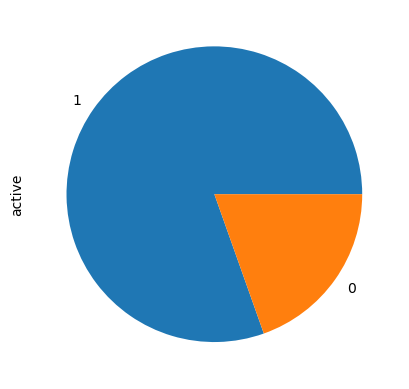

In [212]:
df["active"].value_counts().plot(kind='pie')
#most of the patients in the dataset are seen to be more physically active than inactive

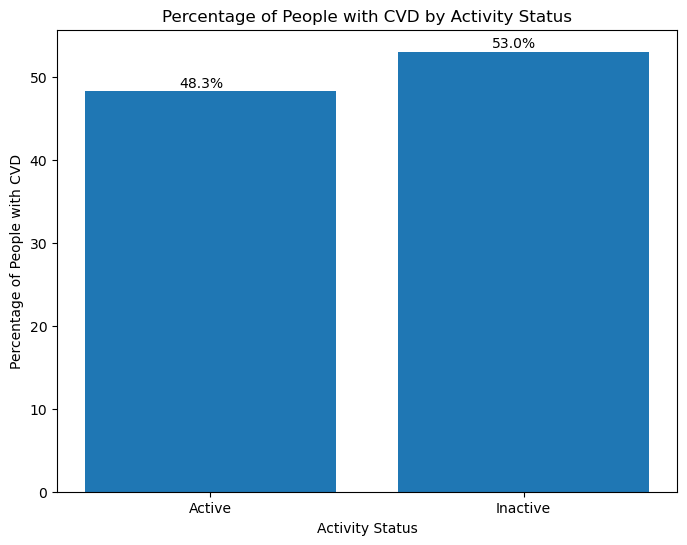

In [213]:
active_with_cvd = df[df['active'] == 1]['cardio'].mean() * 100
inactive_with_cvd = df[df['active'] == 0]['cardio'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Active', 'Inactive'], [active_with_cvd, inactive_with_cvd])
plt.title('Percentage of People with CVD by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Percentage of People with CVD')
plt.text(-0.1, active_with_cvd + 0.5, f'{active_with_cvd:.1f}%', color='black')
plt.text(0.9, inactive_with_cvd + 0.5, f'{inactive_with_cvd:.1f}%', color='black')
plt.show()
#activity has no significant influence on target variable in the dataset through there are more patients with cvd are that physically inactive 

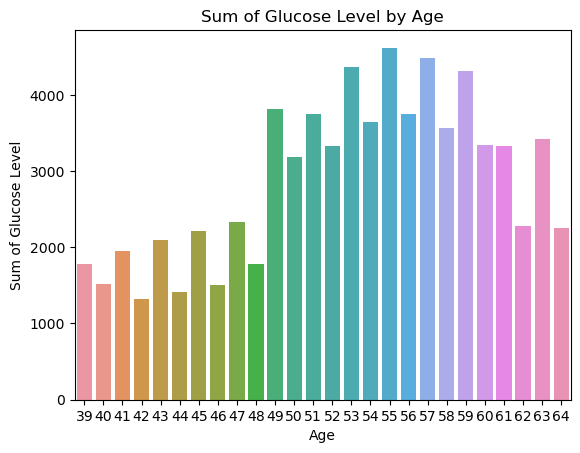

In [214]:
gluc_sum_by_gender = df.groupby('age')['gluc'].sum()
sns.barplot(x=gluc_sum_by_gender.index, y=gluc_sum_by_gender.values)
plt.title('Sum of Glucose Level by Age')
plt.xlabel('Age')
plt.ylabel('Sum of Glucose Level')
plt.show()
# ages 49-59 seems to have the highest glucose level

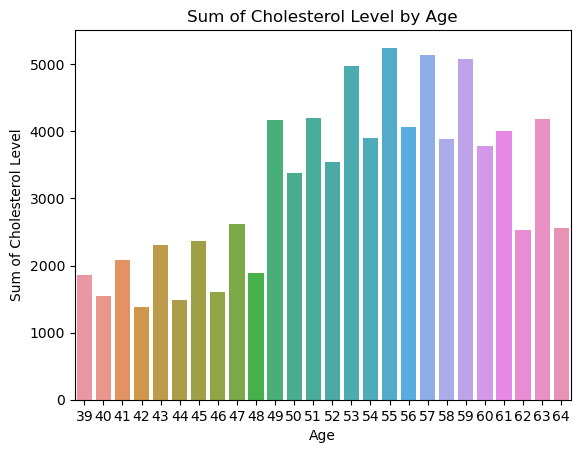

In [215]:
cholesterol_sum_by_age = df.groupby('age')['cholesterol'].sum()
sns.barplot(x=cholesterol_sum_by_age.index, y=cholesterol_sum_by_age.values)
plt.title('Sum of Cholesterol Level by Age')
plt.xlabel('Age')
plt.ylabel('Sum of Cholesterol Level')
plt.show()
# ages 49-59 seems to have the highest cholesterol level

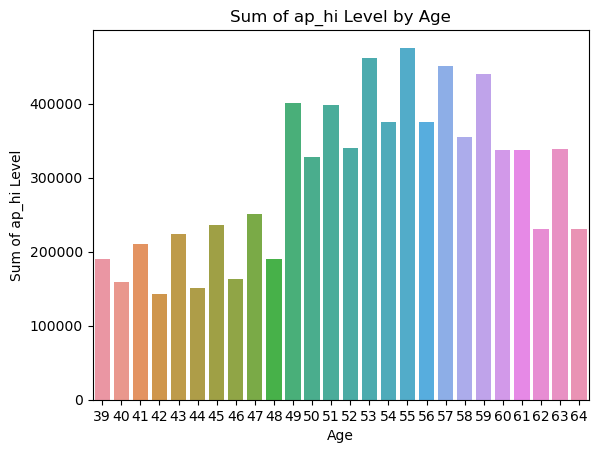

In [216]:
ap_hi_sum_by_age = df.groupby('age')['ap_hi'].sum()
sns.barplot(x=ap_hi_sum_by_age.index, y=ap_hi_sum_by_age.values)
plt.title('Sum of ap_hi Level by Age')
plt.xlabel('Age')
plt.ylabel('Sum of ap_hi Level')
plt.show()
# ages 49-59 seems to have the highest ap_hi

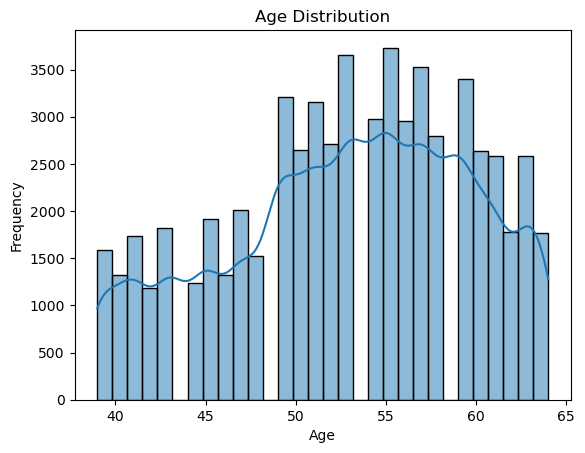

In [217]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#majority of test subject are within the 49-59 age group hence the major influence in the plot above

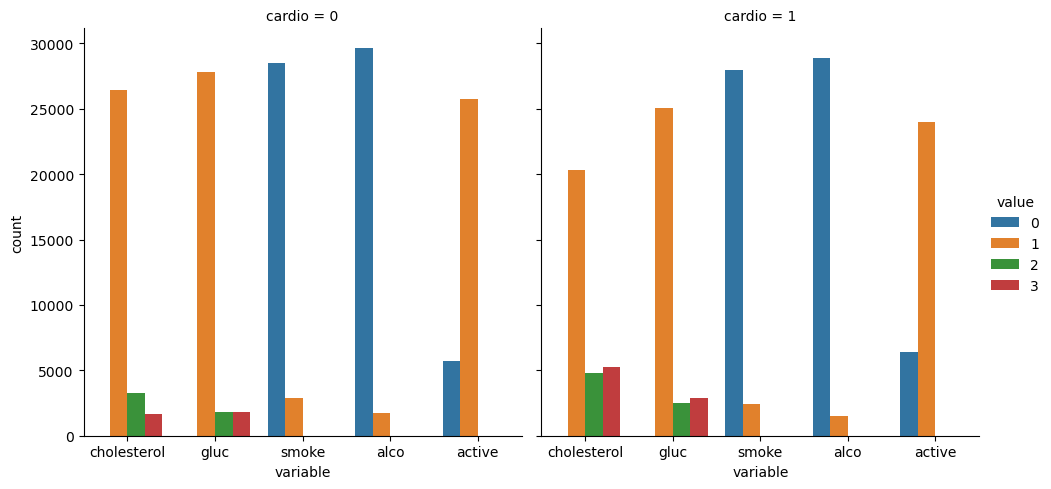

In [218]:
data1 = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value",col="cardio",data= data1,kind="count")
# this shows that patients who have high cholesterol and high glucose level are more prone to have CVD

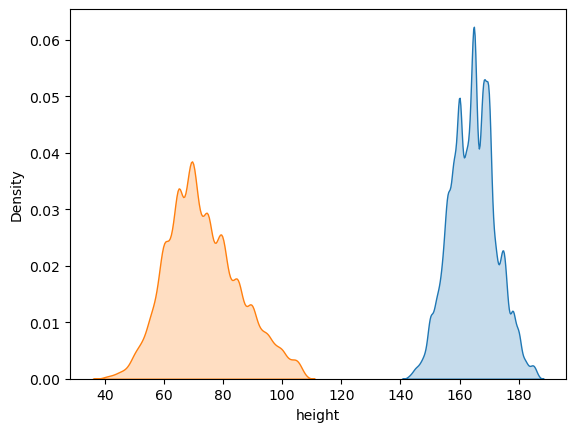

In [219]:
for col in ["height", "weight"]:
    sns.kdeplot(df[col], shade=True)

Calculating the BMI

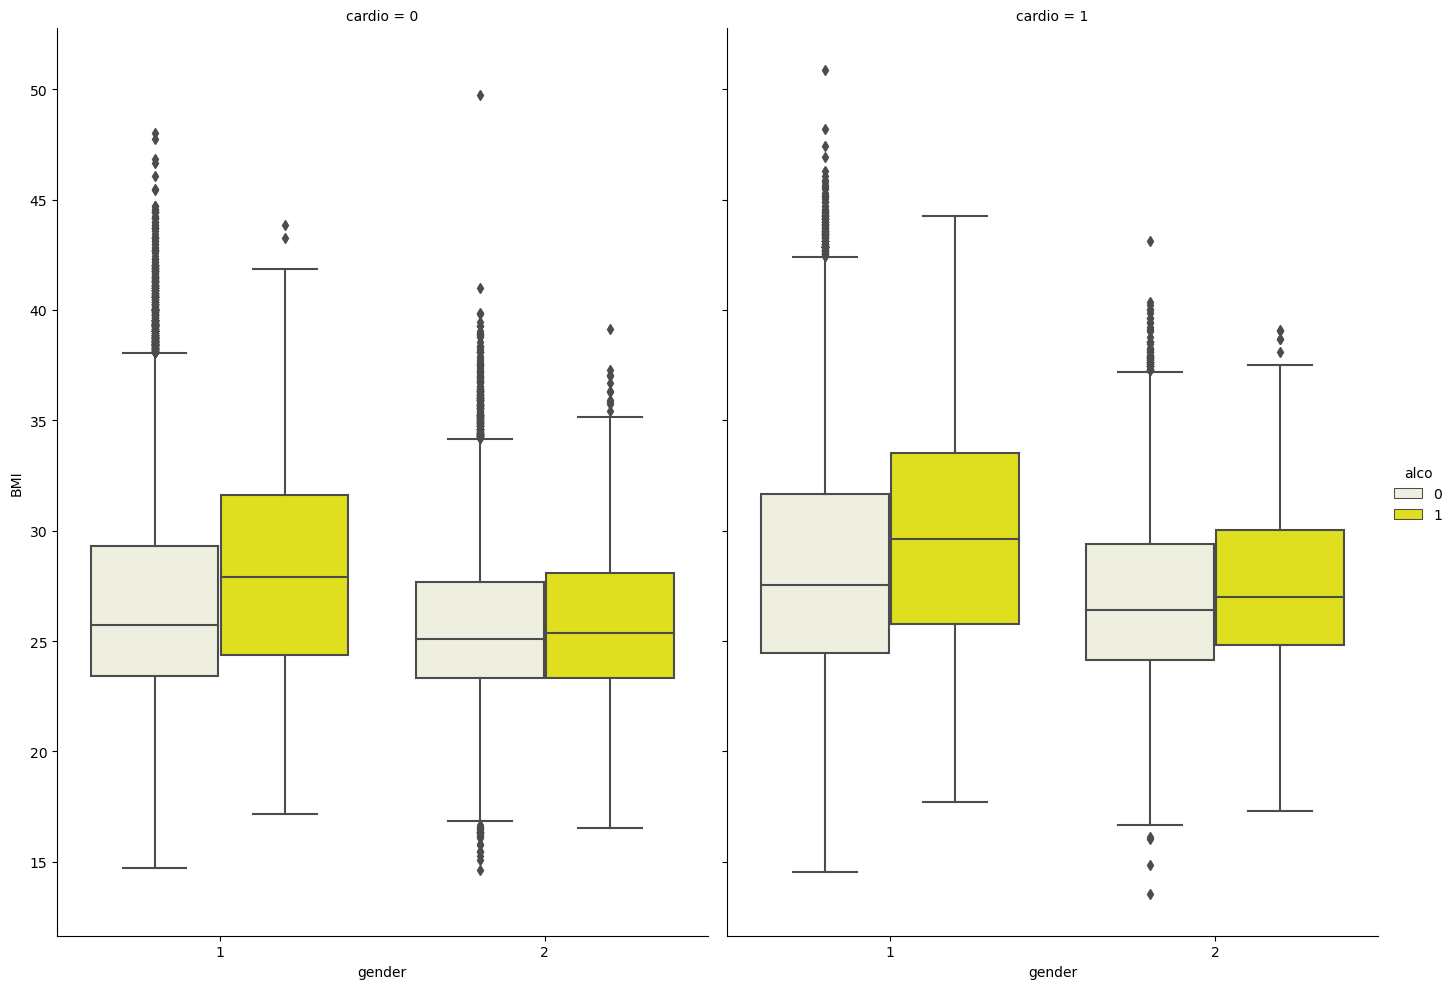

In [220]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7)

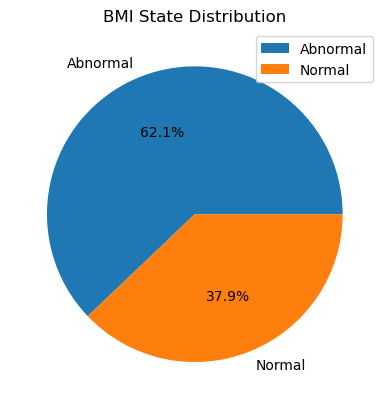

In [221]:
# determining normal & abnormal BMI
def bmi(bmi_num):
  if 18.5 <= bmi_num <= 25:
    return "Normal"
  else:
    return "Abnormal"

df["BMI_State"] = df["BMI"].apply(lambda x: bmi(x))
value_counts = df['BMI_State'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('BMI State Distribution')
plt.legend(value_counts.index)
plt.show()
#There was a higher rate of abnormal BMI than normal

In [222]:
df
df = df.drop('BMI', axis=1)
#drop bmi col since its converted to bmi state

In [223]:
bmi_state_mapping = {'Normal': 0, 'Abnormal': 1}
df['BMI_State'] = df['BMI_State'].map(bmi_state_mapping)
df['BMI_State'] = df['BMI_State'].astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI_State
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,8,59,1,151,67.0,120,80,2,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61766,99991,53,1,172,70.0,130,90,1,1,0,0,1,1,0
61767,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,1
61768,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,1
61769,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,1


<AxesSubplot:xlabel='BMI_State', ylabel='count'>

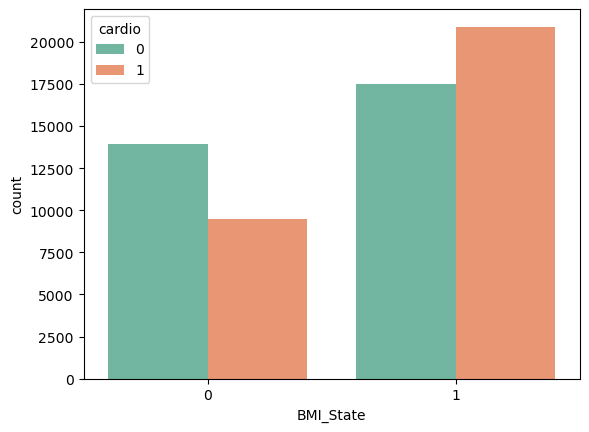

In [224]:
sns.countplot(x='BMI_State', hue='cardio', data = df, palette="Set2")
##patients with abnormal BMI are more prone to CVD

## Multivariate

Using correlation matrix to identify the features that are most strongly associated with the target variable.

C:\Users\Divya\AppData\Local\Temp\ipykernel_51016\1352989231.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)
C:\Users\Divya\AppData\Local\Temp\ipykernel_51016\1352989231.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  create = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

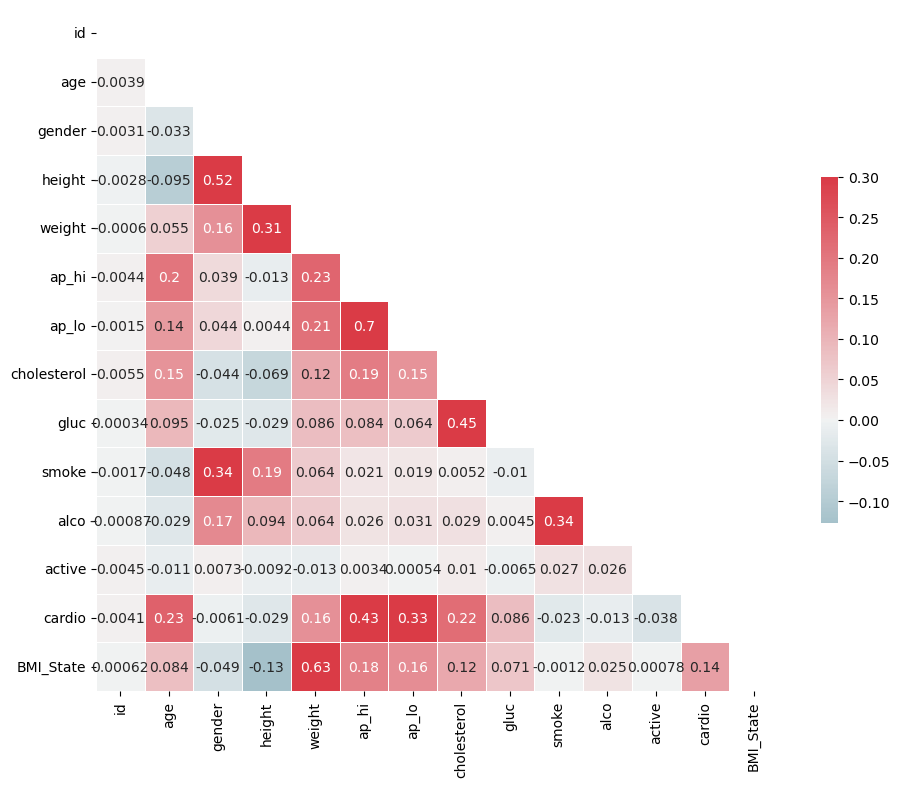

In [225]:
# Compute the correlation matrix
corr_matrix = df.corr()
# create a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
create = np.zeros_like(corr_matrix, dtype=np.bool)
create[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation matrix revealed that age, weight, BMI_State, cholesterol, systolic blood pressure, and diastolic blood pressure had a high positive correlation with the presence or absence of CVD. 


<AxesSubplot:>

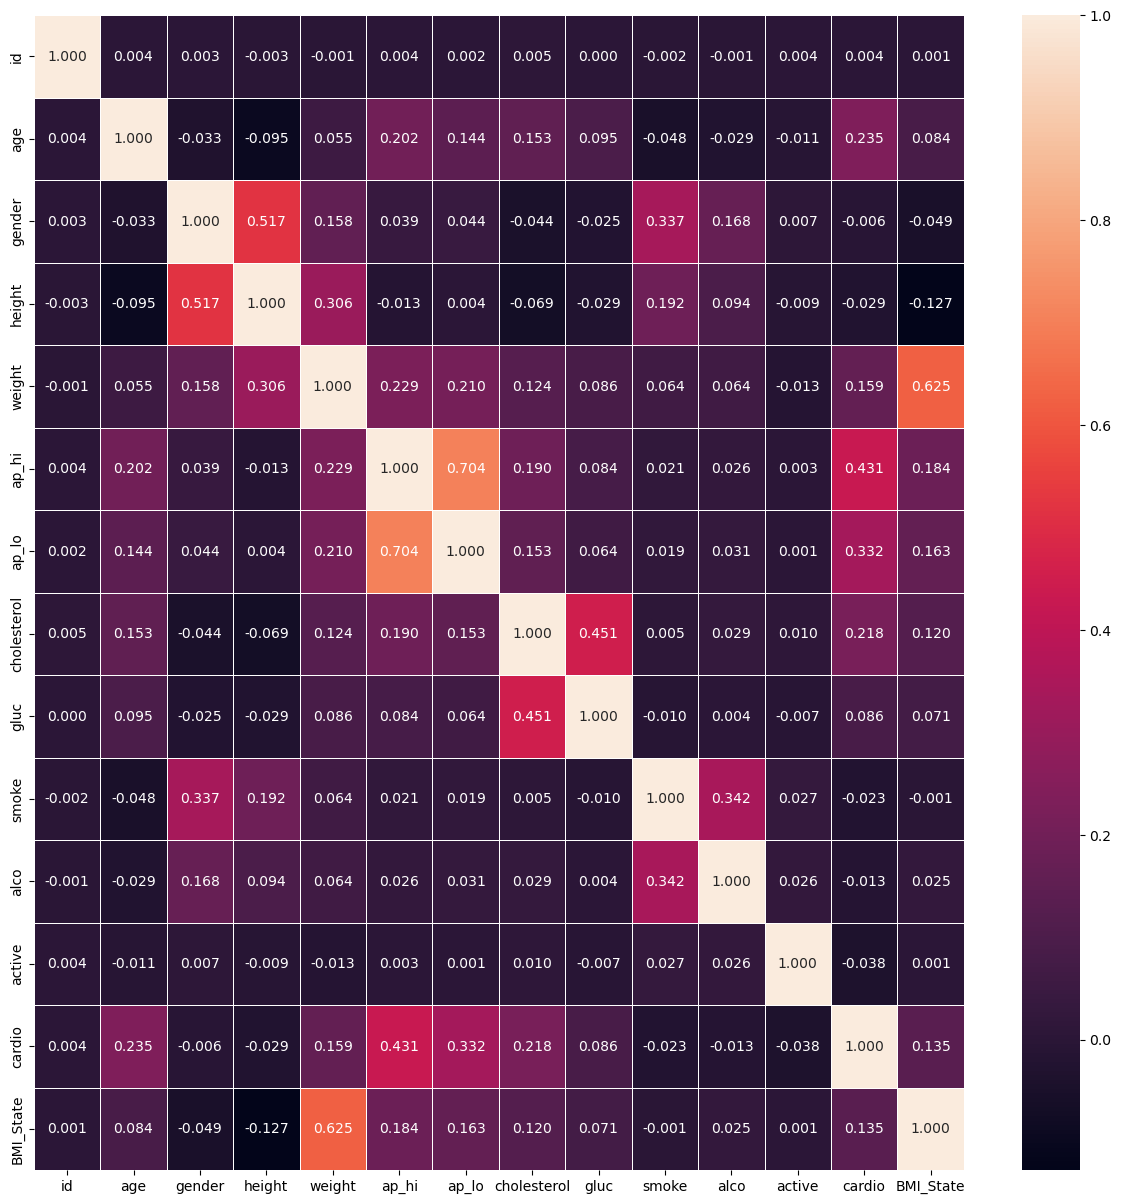

In [226]:
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

From the heatmap, the weight, BMI_State, age, systolic blood pressure, and diastolic blood pressure and cholestrol seem to have the highest correlation with respect to our target variable(cardio). There is a correlation between weight, age and cholesterol?. Being overweight or obese tends to increase bad cholesterol and lower good cholesterol. Aging also causes cholesterol to increase. 

Cholesterol and glucose have a high correlation, whcih makes sense due to studies which show that elevated blood glucose levels (any type of diabetes) poses a risk of higher cholesterol, manifesting as diabetic dyslipidemia.

### Feature Selection


K-best selector using the SelectKBest class with a mutual_info_classif as the scoring function since its suitable for both continuous and categorical features.


In [227]:
X = df.drop("cardio", axis=1)
y = df["cardio"]
k = 6
# SelectKBest object with mutual_info_classif as the scoring function
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_indices]
X_selected = selector.transform(X)
print("Selected features:", selected_features)

Selected features: ['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'BMI_State']


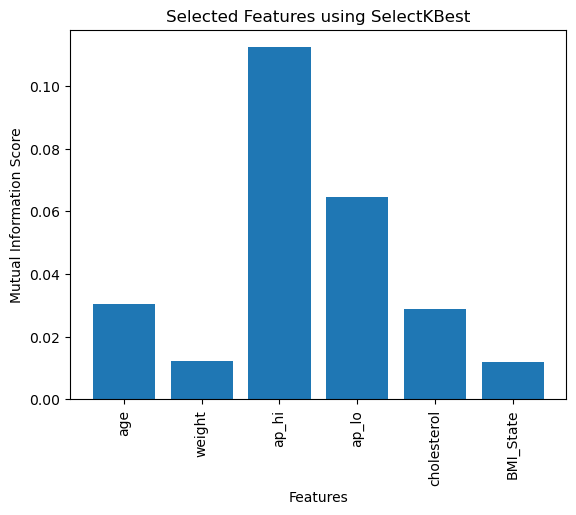

In [228]:
plt.bar(range(len(selected_features)), selector.scores_[selected_indices])
plt.xticks(range(len(selected_features)), selected_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Selected Features using SelectKBest')
plt.show()

The results of the K-best selector confirmed that age, weight, systolic and diastolic blood pressure, cholesterol and BMI_State were highly correlated features that had a significant impact on the presence or absence of CVD. This is consistent with the findings from the correlation matrix, which also identified these features as being strongly associated. 

### Checking linearity of the dataset

In [229]:
polynomial_features = PolynomialFeatures(degree=2) 
X_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
r2 = model.score(X_poly, y)
print(f'R-squared: {r2}')


R-squared: 0.24648303262315074


the linear relationship features and the target variable is relatively weak, there may be other factors or nonlinear relationships that are not captured by the linear regression model. 

#### Binary Classification: Random Forest

In [230]:
# Split the dataset into a 70-20-10 ratio for training, testing, and prediction sets, respectively.
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1), df['cardio'], test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

Experiment training the model with default hyperparameters

In [231]:
# Train model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions 
y_pred = rf_clf.predict(X_test)

# check performance score
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))

Accuracy 0.7158505154639175
Recall 0.6935668685545916
f1 score 0.7060489918346942
precision 0.7189886305786526


Experiemnet undersampling

In [232]:
X = df.drop('cardio', axis=1)
y = df['cardio']

# RandomUnderSampler
rus = RandomUnderSampler()
# ?undersample data
X_resampled, y_resampled = rus.fit_resample(X, y)
print(y_resampled.value_counts())

0    30383
1    30383
Name: cardio, dtype: int64


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [234]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))

Accuracy 0.712379236941215
Recall 0.686803424325634
f1 score 0.7076641424648416
precision 0.7298317885341572


Experiemnt  over sampling

In [235]:
X = df.drop('cardio', axis=1)
y = df['cardio']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())
print(X_resampled.value_counts())

0    31388
1    31388
Name: cardio, dtype: int64
id     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  BMI_State
0      50   2       168     62.0    110    80     1            1     0      0     1       0            1
66585  59   1       160     70.0    130    90     2            1     0      0     1       1            1
66592  59   1       161     70.0    130    90     3            2     0      0     1       1            1
66593  43   1       170     70.0    120    80     1            1     0      0     1       0            1
66594  64   1       170     67.0    120    80     1            1     1      0     1       0            1
                                                                                                      ..
33251  49   1       150     64.0    120    80     2            2     0      0     1       1            1
33252  62   2       160     60.0    120    80     1            1     0      1     1       0            1
33254  47  

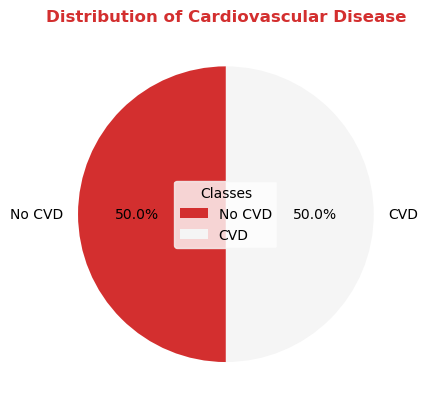

In [236]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  
y_resampled_df = pd.DataFrame(y_resampled, columns=[y.name])  
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)
counts = df_resampled['cardio'].value_counts()
colors = ['#D32F2F', '#F5F5F5']
fig, ax = plt.subplots()
ax.pie(counts, labels=['No CVD', 'CVD'], colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_facecolor('#F5F5F5')
ax.set_title('Distribution of Cardiovascular Disease', color='#D32F2F', fontweight='bold')
ax.legend(title='Classes', loc='center', edgecolor='#F5F5F5')
plt.show()

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [238]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
accuracy1 = accuracy_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)


Accuracy 0.7162783325408147
Recall 0.6978440076093849
f1 score 0.7109173126614986
precision 0.7244897959183674


for teh random forest model the oversampling experiemnt had the highest f1 score , hence it used throughout the experiments

Experiemnt Feature selection using boruta with oversampled dataset

In [239]:
# boruta feature selector
boruta_selector = BorutaPy(rf_clf, n_estimators='auto', verbose=2)
boruta_selector.fit(X_train.values, y_train.values)
selected_features = X_train.columns[boruta_selector.support_].tolist()

# Update test and training set
X_train = X_train[selected_features]
X_test = X_test[selected_features]

param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]   
}

# Grid search
grid_search = GridSearchCV(rf_clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train with the best hyperparameters
best_rf_clf_boruta = RandomForestClassifier(**best_params)
best_rf_clf_boruta.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_clf_boruta.predict(X_test)

# Evaluate the model
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
accuracy2 = accuracy_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_score2 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	10
I

Experiment grid search only

In [240]:
param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]   
}

# Grid search
grid_search = GridSearchCV(rf_clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train with the best hyperparameters
best_rf_clf = RandomForestClassifier(**best_params)
best_rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
accuracy3 = accuracy_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f1_score3 = f1_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)


Accuracy 0.7131082580440641
Recall 0.6707355738744452
f1 score 0.7003807316669425
precision 0.7327675788015241


Experiment Cross validation and stratification 

In [241]:
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# Cross-validation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_rf_clf, X_train, y_train, cv=stratified_kfold, scoring=scoring_metrics)
# evaluate
print("Cross-validation results:")
for metric in scoring_metrics:
    print(f"Mean {metric}: {cv_results[f'test_{metric}'].mean()}")


Cross-validation results:
Mean accuracy: 0.7126275924311191
Mean precision: 0.7318919430812967
Mean recall: 0.6706739526411658
Mean f1: 0.699905584264083


#### roc curve

To effectively predict the probability of a patient having CVD, we needed to determine an appropriate decision threshold.

To accomplish this, we utilized the receiver operating characteristic (ROC) curve to assess the trade-off between true positive rate (TPR) and false positive rate (FPR) at different decision thresholds. 


Optimal decision threshold: 0.5122486008969224


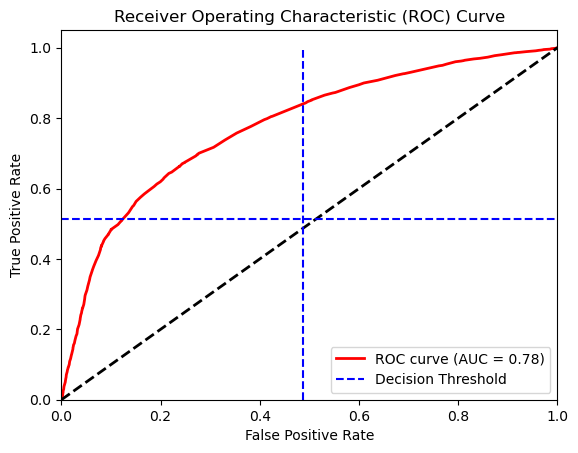

In [242]:
y_prob = best_rf_clf_boruta.predict_proba(X_test)[:, 1]
y_test = y_test

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal decision threshold:", optimal_threshold)
plt.plot([0, 1], [optimal_threshold, optimal_threshold], linestyle='--', color='blue', label='Decision Threshold')
plt.plot([1 - optimal_threshold, 1 - optimal_threshold], [0, 1], linestyle='--', color='blue')
plt.legend(loc="lower right")
plt.show()

Mkaing prediction

In [243]:
y_pred_proba =best_rf_clf_boruta.predict_proba(X_test)[:, 1]  
decision_threshold = optimal_threshold
y_pred = (y_pred_proba >= decision_threshold).astype(int)  
print("Predicted probabilities of CVD:\n", y_pred_proba)
print("Predicted binary labels for CVD (0 or 1):\n", y_pred)

Predicted probabilities of CVD:
 [0.15404502 0.12901756 0.52680794 ... 0.6916949  0.41786456 0.78754259]
Predicted binary labels for CVD (0 or 1):
 [0 0 1 ... 1 0 1]


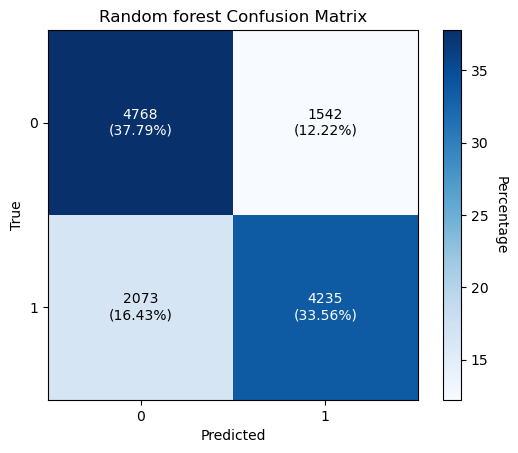

In [244]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm / np.sum(cm) * 100
fig, ax = plt.subplots()
im = ax.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage', rotation=-90, va="bottom")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f'{cm[i, j]}\n({cm_percent[i, j]:.2f}%)',
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
ax.set_title("Random forest Confusion Matrix")
plt.show()


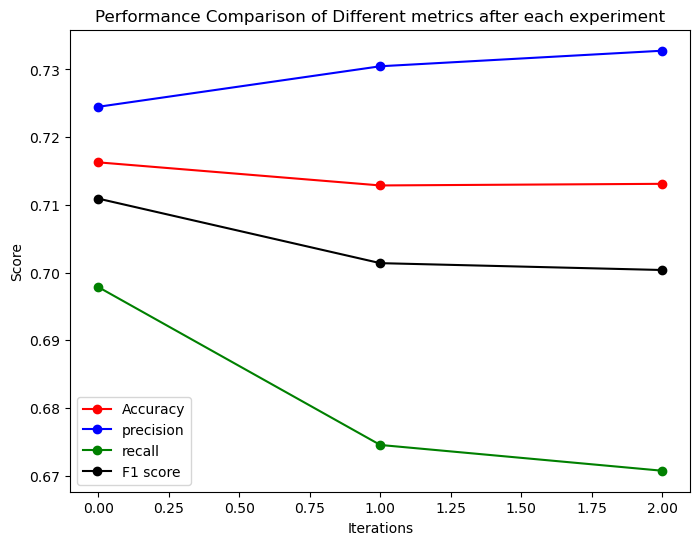

In [245]:
models = ['Accuracy', 'precision', 'recall', 'F1 score']
scores = [[accuracy1, accuracy2, accuracy3], [precision1, precision2, precision3], [recall1, recall2, recall3],[f1_score1, f1_score2, f1_score3]]


fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Performance Comparison of Different metrics after each experiment')
plt.xlabel('Iterations')
plt.ylabel('Score')
colors = ['red', 'blue', 'green', 'black']
for i, model in enumerate(models):
    plt.plot(scores[i], marker='o', color=colors[i], label=model)
plt.legend()

#### Create a logistic regression model

In [246]:
lr_model= linear.LogisticRegression(max_iter=10000)
print(lr_model.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


Train the model using the training dataset

In [247]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Get predicted class

In [248]:
pred_lr = lr_model.predict(X_test) 

The micro averaging method, which computes the F1 score globally by counting the total number of true positives, false negatives, and false positives across all classes. This method gives equal weight to each instance, regardless of its class label.

The macro averaging method, which computes the F1 score separately for each class and then takes the average over all classes. This method gives equal weight to each class, regardless of its frequency or imbalance in the dataset.

By comparing the F1 scores computed using different averaging methods, we can get a sense of how well the logistic regression model performs on the test dataset overall (micro-average) and on each individual class (macro-average). A higher F1 score indicates better performance, with a maximum score of 1.0 indicating perfect precision and recall.

In [249]:
print('F1-micro score of LR is ', metrics.f1_score(y_test, pred_lr, average='micro'))
print('F1-macro score of LR is ', metrics.f1_score(y_test, pred_lr, average='macro'))

F1-micro score of LR is  0.7104929465842448
F1-macro score of LR is  0.7092134350446371


By computing these evaluation metrics on the logistic regression model, we can assess the overall performance of the logistic regression model on the test dataset and identify areas where it may need improvement.

In [250]:
rf_clf = lr_model
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))

Accuracy 0.7104929465842448
Recall 0.6442612555485099
f1 score 0.6899244546303371
precision 0.742554357756258


Experiment undersampling

In [251]:
X = df.drop('cardio', axis=1)
y = df['cardio']

# RandomUnderSampler
rus = RandomUnderSampler()
# undersample data
X_resampled, y_resampled = rus.fit_resample(X, y)
print(y_resampled.value_counts())

0    30383
1    30383
Name: cardio, dtype: int64


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [253]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))

Accuracy 0.6976420501064352
Recall 0.6473913745759974
f1 score 0.68460158852165
precision 0.7263501268575571


Experiemnt  over sampling

In [254]:
X = df.drop('cardio', axis=1)
y = df['cardio']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())
print(X_resampled.value_counts())

0    31388
1    31388
Name: cardio, dtype: int64
id     age  gender  height  weight     ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  BMI_State
0      50   2       168     62.000000  110    80     1            1     0      0     1       0            1
66567  49   1       157     49.000000  110    70     1            1     0      0     1       0            1
66569  59   1       160     60.000000  140    100    2            1     0      0     1       0            1
66570  51   1       156     75.000000  130    80     1            1     0      0     1       1            1
66571  60   1       164     64.072246  120    76     2            1     0      0     0       0            1
                                                                                                         ..
33241  56   1       162     57.000000  140    90     1            3     0      0     1       0            1
33242  48   1       155     81.000000  110    80     1            1     0      0     1      

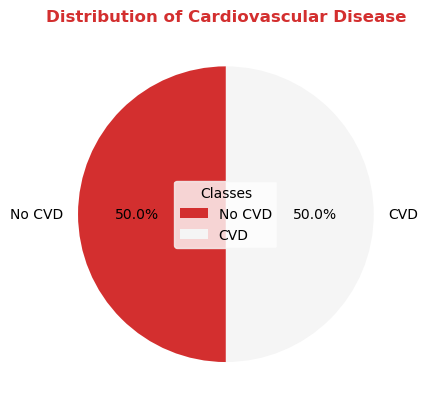

In [255]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  
y_resampled_df = pd.DataFrame(y_resampled, columns=[y.name])  
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)
counts = df_resampled['cardio'].value_counts()
colors = ['#D32F2F', '#F5F5F5']
fig, ax = plt.subplots()
ax.pie(counts, labels=['No CVD', 'CVD'], colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_facecolor('#F5F5F5')
ax.set_title('Distribution of Cardiovascular Disease', color='#D32F2F', fontweight='bold')
ax.legend(title='Classes', loc='center', edgecolor='#F5F5F5')
plt.show()

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [257]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
accuracy1 = accuracy_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)

Accuracy 0.6934537961642099
Recall 0.6521876981610654
f1 score 0.6802248677248678
precision 0.7107809260539046


Tune the model to improve performance

The default solver(lbfgs) in sklearn for Logistic regression does not support l1 penalty, so we only tested the default penalty (l2).

In [258]:
X = df.drop("cardio", axis=1)
y = df["cardio"]
k = 6
# SelectKBest object with mutual_info_classif as the scoring function
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_indices]
X_selected = selector.transform(X)

# Update test and training set
X_train = X_train[selected_features]
X_test = X_test[selected_features]


lr_parameters = {'C': np.logspace(-3, 3, 7)}

# Grid search
grid_search = GridSearchCV(lr_model, lr_parameters, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train with the best hyperparameters
best_lr_k = linear.LogisticRegression(max_iter=10000,**best_params)
best_lr_k.fit(X_train, y_train)

# Make predictions
y_pred = best_lr_k.predict(X_test)

# Evaluate the model
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
accuracy2 = accuracy_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_score2 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)


Accuracy 0.7188143921382153
Recall 0.6594800253646164
f1 score 0.7010448264239973
precision 0.7482014388489209


In [259]:
# Define the parameter grid to search over
lr_parameters = {'C': np.logspace(-3, 3, 7)}
# Perform grid search
grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_parameters, cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'C': 0.1}


In [260]:
lr_model_tuned = grid_search.best_params_

# Train with the best hyperparameters
best_lr = linear.LogisticRegression(max_iter=10000,**best_params)
best_lr.fit(X_train, y_train)

# Make predictions
pred_tuned_lr = best_lr.predict(X_test)

print("Accuracy",  accuracy_score(y_test, pred_tuned_lr))
print("Recall",recall_score(y_test, pred_tuned_lr))
print("f1 score", f1_score(y_test, pred_tuned_lr))
print("precision",precision_score(y_test, pred_tuned_lr))

Accuracy 0.7188143921382153
Recall 0.6594800253646164
f1 score 0.7010448264239973
precision 0.7482014388489209


Experiment Cross validation and stratification 

In [261]:
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# Cross-validation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_lr, X_train, y_train, cv=stratified_kfold, scoring=scoring_metrics)
# evaluate
print("Cross-validation results:")
for metric in scoring_metrics:
    print(f"Mean {metric}: {cv_results[f'test_{metric}'].mean()}")

Cross-validation results:
Mean accuracy: 0.7169740665093585
Mean precision: 0.7470396401320661
Mean recall: 0.6557377049180328
Mean f1: 0.6983750870993243


To choose the best threshold, we plot a receiver operating characteristic (ROC) curve and find the threshold that maximizes the area under the curve (AUC)

Optimal decision threshold: 0.48018411254547766


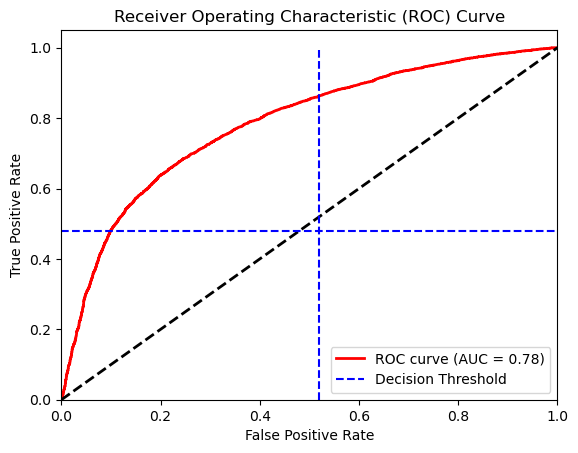

In [262]:

y_prob = best_lr_k.predict_proba(X_test)[:, 1]
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal decision threshold:", optimal_threshold)


plt.plot([0, 1], [optimal_threshold, optimal_threshold], linestyle='--', color='blue', label='Decision Threshold')
plt.plot([1 - optimal_threshold, 1 - optimal_threshold], [0, 1], linestyle='--', color='blue')


plt.legend(loc="lower right")


plt.show()

In [263]:
y_pred_proba =best_lr_k.predict_proba(X_test)[:, 1]  
decision_threshold = optimal_threshold
y_pred = (y_pred_proba >= decision_threshold).astype(int)  
print("Predicted probabilities of CVD:\n", y_pred_proba)
print("Predicted binary labels for CVD (0 or 1):\n", y_pred)

Predicted probabilities of CVD:
 [0.24535719 0.12731569 0.4443825  ... 0.75119324 0.40309426 0.83573127]
Predicted binary labels for CVD (0 or 1):
 [0 0 0 ... 1 0 1]


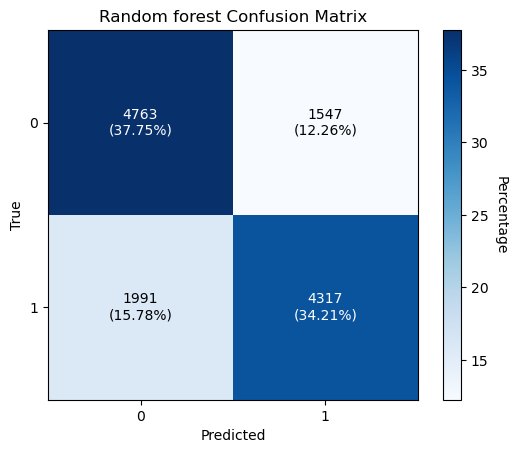

In [264]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm / np.sum(cm) * 100
fig, ax = plt.subplots()
im = ax.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage', rotation=-90, va="bottom")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f'{cm[i, j]}\n({cm_percent[i, j]:.2f}%)',
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
ax.set_title("Random forest Confusion Matrix")
plt.show()


Bayesian Model

# Build Naive Bayes Model with Default Hyperparameter

In [265]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Creating a model
baye_model = GaussianNB()

Training the model using training dataset

In [266]:
baye_model.fit(X_train, y_train)

GaussianNB()

Get predicted class

In [267]:
bay_pred = baye_model.predict(X_test)

Overall performance on the test dataset
Discovering areas of improvement.

In [268]:
print('Accuracy score for training dataset:', accuracy_score(y_test, bay_pred))
print('Precision score for training dataset:', precision_score(y_test, bay_pred))
print('Recall score for training dataset:', recall_score(y_test, bay_pred))
print('F1 score for training dataset:', f1_score(y_test, bay_pred))

Accuracy score for training dataset: 0.7139800285306704
Precision score for training dataset: 0.7669634025717111
Recall score for training dataset: 0.6146163601775523
F1 score for training dataset: 0.6823902138519756


Experimenting undersampling

In [269]:
x = df.drop('cardio', axis = 1)
y = df['cardio']

#RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,y)
print(y_resampled.value_counts())

0    30383
1    30383
Name: cardio, dtype: int64


In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [271]:
baye_model = GaussianNB()
baye_model.fit(X_train, y_train)
bay_pred = baye_model.predict(X_test)
print('Accuracy score for training dataset:', accuracy_score(y_test, bay_pred))
print('Precision score for training dataset:', precision_score(y_test, bay_pred))
print('Recall score for training dataset:', recall_score(y_test, bay_pred))
print('F1 score for training dataset:', f1_score(y_test, bay_pred))

Accuracy score for training dataset: 0.7083674471917472
Precision score for training dataset: 0.7863210629492485
Recall score for training dataset: 0.5831045065417542
F1 score for training dataset: 0.6696345761454275


Experiment oversampling

In [272]:
X = df.drop('cardio', axis=1)
y = df['cardio']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())
print(X_resampled.value_counts())

0    31388
1    31388
Name: cardio, dtype: int64
id     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  BMI_State
0      50   2       168     62.0    110    80     1            1     0      0     1       0            1
66648  50   1       164     82.0    145    89     1            1     0      0     0       1            1
66651  63   1       159     97.0    140    90     3            3     0      0     0       1            1
66652  39   1       169     79.0    110    70     1            1     0      0     1       1            1
66654  53   1       160     80.0    140    90     1            1     0      0     1       1            1
                                                                                                      ..
33320  50   2       168     68.0    140    90     1            2     0      0     1       0            1
33321  52   1       165     65.0    120    80     1            1     0      0     1       0            1
33322  47  

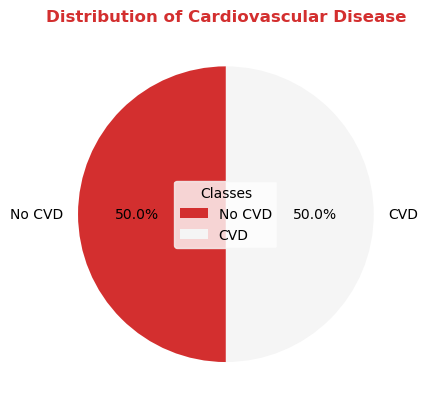

In [273]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  
y_resampled_df = pd.DataFrame(y_resampled, columns=[y.name])  
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)
counts = df_resampled['cardio'].value_counts()
colors = ['#D32F2F', '#F5F5F5']
fig, ax = plt.subplots()
ax.pie(counts, labels=['No CVD', 'CVD'], colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_facecolor('#F5F5F5')
ax.set_title('Distribution of Cardiovascular Disease', color='#D32F2F', fontweight='bold')
ax.legend(title='Classes', loc='center', edgecolor='#F5F5F5')
plt.show()

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_test, X_predict, y_test, y_predict = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [275]:
baye_model = GaussianNB()
baye_model.fit(X_train, y_train)
bay_pred = baye_model.predict(X_test)
print('Accuracy score for training dataset:', accuracy_score(y_test, bay_pred))
print('Precision score for training dataset:', precision_score(y_test, bay_pred))
print('Recall score for training dataset:', recall_score(y_test, bay_pred))
print('F1 score for training dataset:', f1_score(y_test, bay_pred))

Accuracy score for training dataset: 0.7118402282453637
Precision score for training dataset: 0.7798491830749895
Recall score for training dataset: 0.5902029169308814
F1 score for training dataset: 0.6719003789929615


Experiment Feature Selection

In [276]:
X = df.drop("cardio", axis=1)
y = df["cardio"]
k = 6
# SelectKBest object with mutual_info_classif as the scoring function
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_indices]
X_selected = selector.transform(X)
print("Selected features:", selected_features)

Selected features: ['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


In [284]:
# Update test and training set
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [285]:
parameters = {'max_depth': range(1, 11),
              'min_samples_leaf': range(1, 6)}

baye_gridsearch = GridSearchCV(estimator=baye_model, param_grid=parameters, cv=5, n_jobs=-1)
param_grid_gnb = {'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]}

In [303]:
# Grid search
gaussianNB_cv = GridSearchCV(baye_model, param_grid_gnb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gaussianNB_cv.fit(X_train, y_train)
best_param = gaussianNB_cv.best_params_


Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [304]:
if 'C' in best_params:
    del best_params['C']

best_nb_k = GaussianNB(**best_params)

In [305]:
best_nb_k.fit(X_train, y_train)
#Train the test
y_pred = best_nb_k.predict(X_test)

In [306]:
# Evaluate the model
print("Accuracy",  accuracy_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred))
accuracy2 = accuracy_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_score2 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)

Accuracy 0.711760976382945
Recall 0.6122384273937856
f1 score 0.6798697297773084
precision 0.7642984365723333


In [307]:
# Define the parameter grid to search over
parameters = {'max_depth': range(1, 11),
              'min_samples_leaf': range(1, 6)}

baye_gridsearch = GridSearchCV(estimator=baye_model, param_grid=parameters, cv=5, n_jobs=-1)
param_grid_gnb = {'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]}
# Perform grid search
gaussianNB_cv = GridSearchCV(baye_model, param_grid_gnb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gaussianNB_cv.fit(X_train, y_train)

print('Best parameters:', gaussianNB_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'var_smoothing': 0.0001}


In [308]:
baye_tuned = gaussianNB_cv.best_params_

# Train with the best hyperparameters
best_nb_k = GaussianNB(**best_params)
best_nb_k.fit(X_train, y_train)
# Make predictions
pred_tuned_lr = best_nb_k.predict(X_test)

print("Accuracy",  accuracy_score(y_test, pred_tuned_lr))
print("Recall",recall_score(y_test, pred_tuned_lr))
print("f1 score", f1_score(y_test, pred_tuned_lr))
print("precision",precision_score(y_test, pred_tuned_lr))


Accuracy 0.711760976382945
Recall 0.6122384273937856
f1 score 0.6798697297773084
precision 0.7642984365723333


Experimental Cross Validation and Stratification

In [309]:
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# Cross-validation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_lr, X_train, y_train, cv=stratified_kfold, scoring=scoring_metrics)
# evaluate
print("Cross-validation results:")
for metric in scoring_metrics:
    print(f"Mean {metric}: {cv_results[f'test_{metric}'].mean()}")

Cross-validation results:
Mean accuracy: 0.7171789249327001
Mean precision: 0.747390041342531
Mean recall: 0.6557377049180328
Mean f1: 0.6985250493284656


Optimal decision threshold: 0.38395211938893187


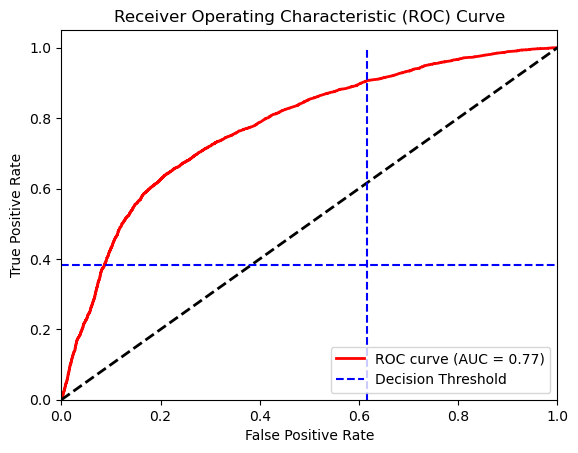

In [310]:
y_prob = best_nb_k.predict_proba(X_test)[:, 1]
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal decision threshold:", optimal_threshold)


plt.plot([0, 1], [optimal_threshold, optimal_threshold], linestyle='--', color='blue', label='Decision Threshold')
plt.plot([1 - optimal_threshold, 1 - optimal_threshold], [0, 1], linestyle='--', color='blue')


plt.legend(loc="lower right")


plt.show()

In [311]:
y_pred_proba =best_nb_k.predict_proba(X_test)[:, 1]  
decision_threshold = optimal_threshold
y_pred = (y_pred_proba >= decision_threshold).astype(int)  
print("Predicted probabilities of CVD:\n", y_pred_proba)
print("Predicted binary labels for CVD (0 or 1):\n", y_pred)

Predicted probabilities of CVD:
 [0.16482893 0.0293483  0.18329769 ... 0.79085257 0.17809688 0.98670007]
Predicted binary labels for CVD (0 or 1):
 [0 0 0 ... 1 0 1]


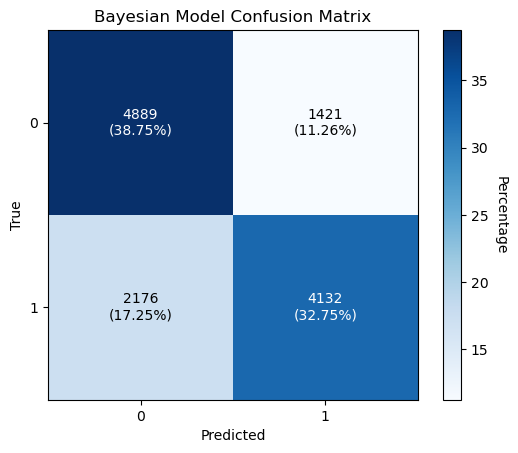

In [312]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm / np.sum(cm) * 100
fig, ax = plt.subplots()
im = ax.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage', rotation=-90, va="bottom")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f'{cm[i, j]}\n({cm_percent[i, j]:.2f}%)',
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
ax.set_title("Bayesian Model Confusion Matrix")
plt.show()

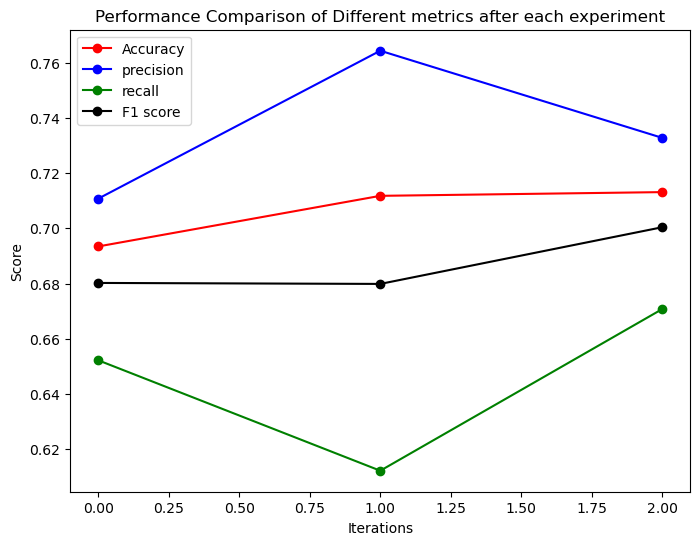

In [313]:
models = ['Accuracy', 'precision', 'recall', 'F1 score']
scores = [[accuracy1, accuracy2, accuracy3], [precision1, precision2, precision3], [recall1, recall2, recall3],[f1_score1, f1_score2, f1_score3]]


fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Performance Comparison of Different metrics after each experiment')
plt.xlabel('Iterations')
plt.ylabel('Score')
colors = ['red', 'blue', 'green', 'black']
for i, model in enumerate(models):
    plt.plot(scores[i], marker='o', color=colors[i], label=model)
plt.legend()